# Session 10: Cross-Validation

Let's put in practice what we learned about cross-validation.

In this case, we are going to use the `K-Fold` cross-validation technique to evaluate the performance of a model.

We will be trying different combinations of hyperparameters for a `RandomForestClassifier` model within the `K-Fold` cross-validation. At the end, we will choose the best hyperparameters based on the average accuracy of the model.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np
import plotly.express as px


In [3]:
data = pd.read_csv('shipping.csv')

data.columns = [col.replace('.', '_').replace(' ', '_').lower() for col in data.columns]

data.head()

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y_n
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## The dataset

In this dataset, we have information about different orders shipped by an e-commerce company. The dataset contains the following columns:

- **ID:** ID Number of Customers.
- **Warehouse block:** The Company has a big Warehouse which is divided into blocks such as A, B, C, ...
- **Mode of shipment:** The Company ships the products in multiple ways such as Ship, Flight, and Road.
- **Customer care calls:** The number of calls made for enquiry of the shipment.
- **Customer rating:** The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- **Cost of the product:** Cost of the Product in US Dollars.
- **Prior purchases:** The Number of Prior Purchases.
- **Product importance:** The company has categorized the product in various parameters such as low, medium, high.
- **Gender:** Male and Female.
- **Discount offered:** Discount offered on that specific product.
- **Weight in gms:** It is the weight in grams.
- **Reached on time:** It is the target variable, where 1 indicates that the product has NOT reached on time and 0 indicates it has reached on time.

## Question 1

Separate the dataset into features and target variable.

In [4]:
target_column = 'reached_on_time_y_n'
x = data.drop(target_column, axis=1) # features - target column
y = data[target_column] # target column

print(" Customer Rating :")
print(y)

print(" Features :")
print(x)


 Customer Rating :
0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: reached_on_time_y_n, Length: 10999, dtype: int64
 Features :
          id warehouse_block mode_of_shipment  customer_care_calls  \
0          1               D           Flight                    4   
1          2               F           Flight                    4   
2          3               A           Flight                    2   
3          4               B           Flight                    3   
4          5               C           Flight                    2   
...      ...             ...              ...                  ...   
10994  10995               A             Ship                    4   
10995  10996               B             Ship                    4   
10996  10997               C             Ship                    5   
10997  10998               F             Ship                    5   
10998  10999           

## Question 2

Is the dataset balanced?

In [5]:
# Calculate the distribution of the target column, customer_rating
# Check the frequency of the values in the target column
distribution = y.value_counts()
print("Distribution of the customer ratings:")
print(distribution)

Distribution of the customer ratings:
reached_on_time_y_n
1    6563
0    4436
Name: count, dtype: int64


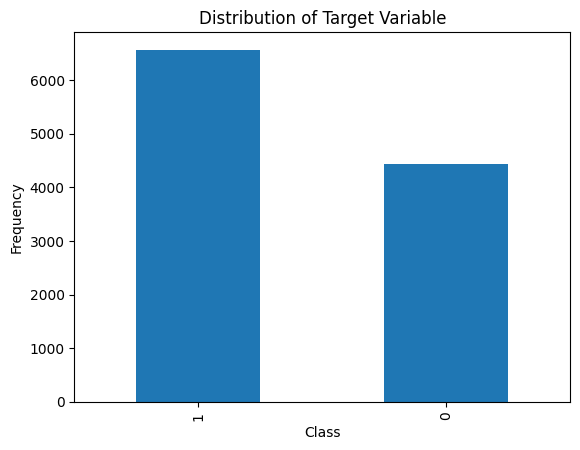

In [6]:
# Visualize the dsitribution
import matplotlib.pyplot as plt
distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

## Question 3

Dealing with the ID: should we keep it in the dataset?

If there are several rows with the same ID then it might be important to understand recurrence. If not, we can drop it.

Please check if there are any repeated IDs in the dataset. If there are, keep the column, otherwise drop it.

In [7]:
id_column = data['id']
id_distribution = id_column.value_counts()
print(id_distribution)

# For loop to process each row
for counter in id_distribution:
    if counter > 1:
        print(counter)

print('counter done')

id
10999    1
1        1
2        1
3        1
4        1
        ..
12       1
11       1
10       1
9        1
8        1
Name: count, Length: 10999, dtype: int64
counter done


In [8]:
# drop the id column
x = x.drop('id',axis=1)
print('Features: ')
print(x)

Features: 
      warehouse_block mode_of_shipment  customer_care_calls  customer_rating  \
0                   D           Flight                    4                2   
1                   F           Flight                    4                5   
2                   A           Flight                    2                2   
3                   B           Flight                    3                3   
4                   C           Flight                    2                2   
...               ...              ...                  ...              ...   
10994               A             Ship                    4                1   
10995               B             Ship                    4                1   
10996               C             Ship                    5                4   
10997               F             Ship                    5                2   
10998               D             Ship                    2                5   

       cost_of_the_product  

## Question 4 

Which are the categorical columns in the dataset?

In [9]:
# To identify if a column is categorical, check if a columns is object type
categorical_columns = x.select_dtypes(include=['object']).columns
print('Categorical columns: ')
print(categorical_columns)

Categorical columns: 
Index(['warehouse_block', 'mode_of_shipment', 'product_importance', 'gender'], dtype='object')


## Question 4

Encode the categorical variables, using the `OneHotEncoder` or `LabelEncoder` from `sklearn`.

In [10]:
# OneHotEncoder

In [11]:
# LabelEncoder

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

x_le = x.copy()

for column in categorical_columns:
    x_le[f'{column}_le'] = label_encoder.fit_transform(data[column])

x_le = x_le.drop(categorical_columns, axis=1) #drop original categorical columns to keep only their encoded version

x_le.head()

,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,warehouse_block_le,mode_of_shipment_le,product_importance_le,gender_le
0,4,2,177,3,44,1233,3,0,1,0
1,4,5,216,2,59,3088,4,0,1,1
2,2,2,183,4,48,3374,0,0,1,1
3,3,3,176,4,10,1177,1,0,2,1
4,2,2,184,3,46,2484,2,0,2,0


## Question 5

Split the dataset into training and test sets.

In [12]:
# train test split, using 30% of the data for testing

x_train, x_test, y_train, y_test = train_test_split(x_le, y, test_size=0.3, random_state=42)

## Question 6

Create a `RandomForestClassifier` model and use the `K-Fold` cross-validation technique to evaluate the model, without changing the hyperparameters.

* Use accuracy as the metric to evaluate the model with `cross_validate`.
    * `accuracy_score` is the number of correct predictions made by the model over all kinds predictions made.
    $$ accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$

* Use 10 folds in the cross-validation.

About classification metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [13]:
# Create a RandomForestClasssifier
# instantiate the model RandomForestClassifier
tree = RandomForestClassifier(random_state=42)

scoring = ['accuracy']

results = cross_validate(
    tree,
    x_train, y_train,
    cv=10,
    scoring = scoring,
    return_train_score=True
)

pd.DataFrame(results)

# Print the results
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric}: {results['test_' + metric].mean():.3f} (+/- {results['test_' + metric].std():.3f})")

Cross-validation results:
accuracy: 0.654 (+/- 0.015)


# Brief intro to random forests

Random forests are an ensemble learning method that can be used for classification and regression.

It works by training several decision trees during training and outputting the majority class (classification) or mean prediction (regression) of the individual trees.

The idea behind random forests is that each tree might be overfitting the data in a different way, so by averaging the predictions of the trees, we can reduce the variance of the model. One of the characteristics of random forests is that none of trees are trained with the same data, they only use some of the variables. By doing that, we can reduce the correlation between the trees and make the model more robust.

The three hyperparameters that we are going to use in this exercise are:

- `n_estimators`: the number of trees in the forest (an integer between 1 and as many as you want).
    * The higher the number of trees, the better the model will generalize to new data.
- `max_depth`: the maximum depth of the trees (an integer between 1 and as many as you want).
    * The higher the depth, the more complex the model will be, the more likely to overfit.
- `max_features`: the number of variables to consider when looking for the best split (an integer between 1 and the number of training variables).
    * The higher the number of features, the more likely to overfit. Should be compensated with a higher `n_estimators`: the more trees, the less features can be repeated in the trees.
    * A good rule of thumb is to use the square root of the number of features, rounded down.

## Question 7

Change the hyperparameters of the model and then use the `K-Fold` cross-validation technique to evaluate the model.

Using the following hyperparameters (more info [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)):

* `n_estimators`: The number of trees in the forest.
* `max_depth`: The maximum depth of the tree.
* `max_features`: The number of variables from the training data to consider when looking for the best split.

Choose 3 combination of hyperparameters, for example, `n_estimators=100`, `max_depth=10`, `min_samples_split=2`, and then repeat the cross-validation process with the same value of `K` (10 folds) for each combination of hyperparameters.

Hint: in order to change the hyperparameters, you can create a new model with the desired hyperparameters.

```python
classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    max_features=np.sqrt(x_train.shape[1]).astype(int)
)
```

In [14]:
tree = RandomForestClassifier(
    random_state=42,
    n_estimators=50,
    max_depth = 10,
    max_features = np.sqrt(x_train.shape[1]).astype(int)
)

scoring = ['accuracy']

results = cross_validate(
    tree,
    x_train, y_train,
    cv=10,
    scoring = scoring,
    return_train_score=True
)

pd.DataFrame(results)

# Print the results
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric}: {results['test_' + metric].mean():.3f} (+/- {results['test_' + metric].std():.3f})")

Cross-validation results:
accuracy: 0.674 (+/- 0.014)


In [15]:
tree = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth = 20,
    max_features = np.sqrt(x_train.shape[1]).astype(int)
)

scoring = ['accuracy']

results = cross_validate(
    tree,
    x_train, y_train,
    cv=10,
    scoring = scoring,
    return_train_score=True
)

pd.DataFrame(results)

# Print the results
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric}: {results['test_' + metric].mean():.3f} (+/- {results['test_' + metric].std():.3f})")

Cross-validation results:
accuracy: 0.654 (+/- 0.017)


In [16]:
print(results)

{'fit_time': array([0.79427052, 0.78457642, 0.75758934, 0.78778338, 0.7905426 ,
       0.77665448, 0.78528142, 0.79397202, 0.74130297, 0.74606323]), 'score_time': array([0.01808262, 0.01678586, 0.01680946, 0.01682091, 0.02271533,
       0.01657557, 0.01655626, 0.01678801, 0.02208495, 0.01680326]), 'test_accuracy': array([0.67532468, 0.66233766, 0.66233766, 0.63116883, 0.66883117,
       0.64545455, 0.62207792, 0.64675325, 0.67532468, 0.65279584]), 'train_accuracy': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}


In [17]:
for metric in scoring:
    train_score_mean = results['train_' + metric].mean()
    test_score_mean = results['test_' + metric].mean()
    train_score_std = results['train_' + metric].std()
    test_score_std = results['test_' + metric].std()
    
    print(f"{metric} - Train: {train_score_mean:.3f} (+/- {train_score_std:.3f})")
    print(f"{metric} - Test: {test_score_mean:.3f} (+/- {test_score_std:.3f})")
    
    if train_score_mean > test_score_mean + 0.05:  # Example threshold
        print("Warning: Potential overfitting detected.")

accuracy - Train: 1.000 (+/- 0.000)
accuracy - Test: 0.654 (+/- 0.017)


## Question 8

What was the best combination of hyperparameters in your opinion? Why?

Experiment 3 was the best in terms of accuracy in the validation sets.
* Experiment 1 seemed to overfit the data, while experiment 2 was not as good as experiment 3.

## Question 9

Now, use the best hyperparameters to train the model and evaluate it on the test set.

Print the accuracy of the model on the test set, and the confusion matrix.

Post the accuracy and confusion matrix of the model on forum!

In [18]:

# instantiate the model RandomForestClassifier
tree = RandomForestClassifier(
    random_state=42,
    n_estimators=50,
    max_depth = 10,
    max_features = np.sqrt(x_train.shape[1]).astype(int)
)

# train the model
tree.fit(x_train, y_train)

# make predictions
y_pred = tree.predict(x_test)

# calculate the accuracy
accuracy_randomforest = accuracy_score(y_test, y_pred)

print('Accuracy: ')
print(accuracy_randomforest)

print('Precision: ')
print(precision_score(y_pred, y_test))
print('Recall: ')
print(recall_score(y_pred, y_test))

print(confusion_matrix(y_pred, y_test))


Accuracy: 
0.6787878787878788
Precision: 
0.5613682092555332
Recall: 
0.8558282208588958
[[1124  872]
 [ 188 1116]]


Confusion Matrix: 
[[1124  188]
 [ 872 1116]]


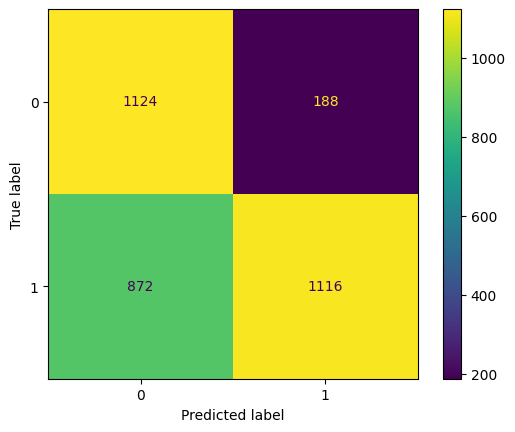

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test,y_pred)
print('Confusion Matrix: ')
print(conf_matrix)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## Question 10

What can you say about the model's performance on the test set? Check the recall and precision of the model to try and explain the model's performance.